In [1]:
import pandas as pd

In [12]:
pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=b540d29a16ada3a5c2057d44fc6ce3e3b39548fc403ee5229c40bd097b383f70
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap


In [2]:
q=pd.read_csv('/content/AllBooks_baselineAsian.csv')

In [7]:
matrix=q.drop(columns=['Unnamed: 0'])

In [17]:
matrix

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


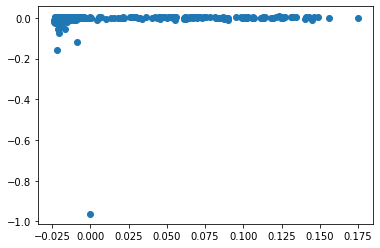

In [9]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

transformer = FastICA(n_components=2, random_state=0)
transformedica = transformer.fit_transform(matrix)

plot = plt.scatter(transformedica[:,0], transformedica[:,1])

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

In [16]:
x_train = matrix.to_numpy()

# Scale data to have zero mean and unit variance
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [18]:


input_dim = 8266

# This is the dimension of the latent space (encoding space)
latent_dim = 2

encoder = Sequential([
    Dense(16, activation='relu', input_shape=(input_dim,)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(10, activation='relu', input_shape=(latent_dim,)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),

    Dense(input_dim, activation=None)
])

In [19]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam')


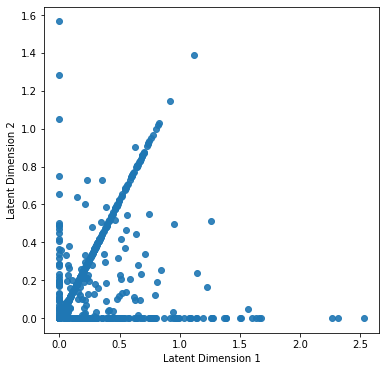

In [20]:
encoded_x_train = encoder(x_train)
plt.figure(figsize=(6,6))
plt.scatter(encoded_x_train[:, 0], encoded_x_train[:, 1], alpha=0.9)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2');

In [35]:
for i in range(len(q)):
    if "Buddhism" in q["Unnamed: 0"][i]:
      q["class"][i]=4

    if "Upanishad" in q["Unnamed: 0"][i]:
      q["class"][i]=1

    if "YogaSutra" in q["Unnamed: 0"][i]:
      q["class"][i]=2

    if "TaoTeChing" in q["Unnamed: 0"][i]:
      q["class"][i]=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying 

In [37]:
q["class"]

0      4
1      4
2      4
3      4
4      4
      ..
585    0
586    0
587    0
588    0
589    0
Name: class, Length: 590, dtype: int64

In [45]:
import plotly.express as px

pd.options.plotting.backend = "plotly"
figplotly1 = px.scatter(encoded_x_train[:,0], y=encoded_x_train[:,1],text=q["Unnamed: 0"],color=q["class"])
figplotly1.show()
#st.plotly_chart(figplotly1, use_container_width=True)

In [46]:
import plotly.express as px

pd.options.plotting.backend = "plotly"
figplotly2 = px.scatter(encoded_x_train[:,0], y=encoded_x_train[:,1],color=q["class"])
figplotly2.show()
#st.plotly_chart(figplotly1, use_container_width=True)